# Šíření vln pro bezdrátové spoje projekt 2

Bc. Tomáš Kestřánek, Bc. Jakub Horáček, Bc. Emil J. Tywoniak

## Úvod
Cílem této práce je realizovat měření v terénu za účelem lepšího porozumění únikům signálu mobilního spoje v pásmu 300 MHz - 3GHz v různých prostředích. Z naměřených dat je dále odvozen empirický model pro závislost ztrát na vzdálenosti. Data jsou také podrobena statistické analýze pro odhalení úniků způsobených vícecestným šířením.

## Měření 1

Data pro výpočet empirického modelu závislosti ztrát na vzdálenosti jsou měřena dvěma způsoby:

1. Chodba budovy FEL Technická 2. Obě antény jsou umístěny na ose chodby ve výšce h_r = 1,4m. Přijímač je statický a vysílač se pohybuje směrem od přijímače. Vzdálenost vysílače a přijímače se pohybuje ve vzdálenosti 1-65 m.
2. Chodba budovy FEL Technická 2. Obě antény jsou umístěny na ose chodby ve výšce h_r = 1,4m. Přijímač je statický a vysílač se pohybuje směrem k  přijímači. Vzdálenost vysílače a přijímače se pohybuje ve vzdálenosti 65-1 m.
 
Pro všechna měření byly použity následující přístroje:

+ Vysílač - Přenosný UHF generátor, frekvence f_T = 2,55 GHz, výkon P_T = 0 dBm, horizontálně polarizovaná všesměrová anténa se ziskem G_T = 9 dBi
+ Přijímač - Přístroj Rode&Schwarz PR100, horizontálně polarizovaná všesměrová anténa se ziskem 5dBi, útlum kabelu odhadem 1,5 dB
 
Z důvodu vládních nařízení jsme měření nemohli provést osobně. Proto jsme použili data naměřená studenty z minulých let určené pro naší skupinu. Pro první způsob soubor „SBS-PRJ2data_A05.csv“ a pro druhý způsob soubor „SBS-PRJ2data_A08.csv“.


## Měření 2
Data pro analýzu statistiky úniků vícecestným šířením jsou měřena ve třech krocích. Všechny kroky jsou měřeny na 2m široké chodbě v pátém patře budovy FEL v Dejvicích. Vysílač a přijímač jsou umístěny naproti sobě v ose chodby ve vzdálenosti 20m. Pro každý krok se ale mění dění na chodbě:

1. Prázdná chodba, žádný pohyb osob.

2. Pohyb osob po chodbě.

3. Pohyb osob po chodbě spolu s otevíráním dveří a při stále zastíněné přímé viditelnosti mezi anténami.

Použili jsme data naměřená studenty z minulých let určené pro naší skupinu. Pro krok 1 soubor „SBS-PRJ2data_R01.csv“, pro krok 2 soubor „SBS-PRJ2data_R02.csv“ a pro krok 3 soubor „SBS-PRJ2data_R03.csv“.

## Závěr

V prvním měření jsme nafitovali one-slope model na filtrovaná data pohyblivého vysílače se standardní odchylkou 5,1 resp. 5,2 dB. Odchylka od modelu měla značně nenormální charakter, viditelný z asymetricity histogramu. One-slope model je validní pro naši situaci, protože Fresnelův zlom je vzdálen 66.7 m, tedy krátce za nejvzdálenějším měřeným bodem. Finálním modelem scénáře je one slope s parametry L1 = -0.9 dB, n = 1.85.


V druhém měření jsme srovnali ztráty pro tři různé míry zastínění s modelem Rice kanálu. Pro všechny případy jsme určili minimum, maximum a medián, viz. výpis výše. Dále jsme vygenerovali distribuční funkci a srovnali ji s teoretickou Rayleigho distribucí normovanou vůči mediánu. Můžeme nahlédnout, že pro měření s prázdnou chodbou nám data odpovídají modelu bez fading, resp. s minimálním únikem v důsledku fading. Pro středně intenzivní pohyb lidí po chodbě je odpovídající model Rice s k=5, pro velmi intenzivní je odpovídající čistě Rayleigh model. Tyto výsledky jsou v souladu s teorií, jelikož Rayleigh model je pro situace s náhodným vícecestným šířením signálu. Poslední percentil ztrát je pro dané tři scénáře 0,7, 9,9, resp. 19,1 dB.

In [21]:
import os
#list the current work dir

#change the current work dir
os.chdir(os.getcwd())
os.chdir(globals()['_dh'][0])
import nbimporter
# Set up notebook and libraries
%matplotlib inline 
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sst
import scipy.signal as sig
from projekt2.functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


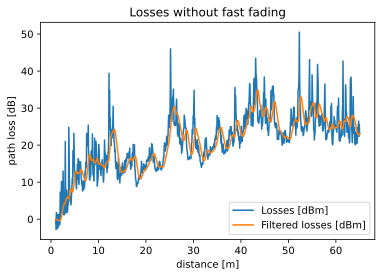

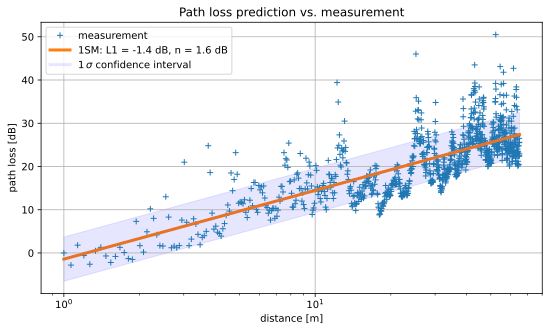

Empirical One Slope Model parameters:
L1 = -1.4 dB
n = 1.6
standard deviation = 5.1 dB
mean error = 3.9 dB


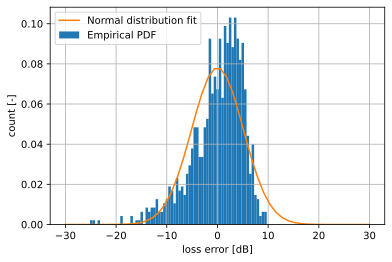

Shapiro-Wilk test p-value: 1.0


In [22]:
# I - Large scale effects / Empirical model
err = []
stdev = []
losses = []
d_axis = []
ret = one_slope('projekt2/data1/SBS-PRJ2data_A05.csv', 1, 65)
losses.append(ret[0])
err.append(ret[1])
stdev.append(ret[2])
d_axis.append(ret[3])

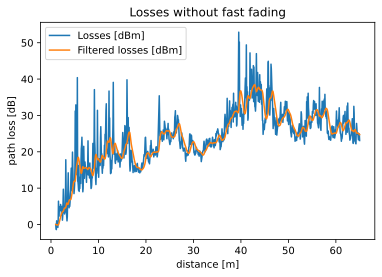

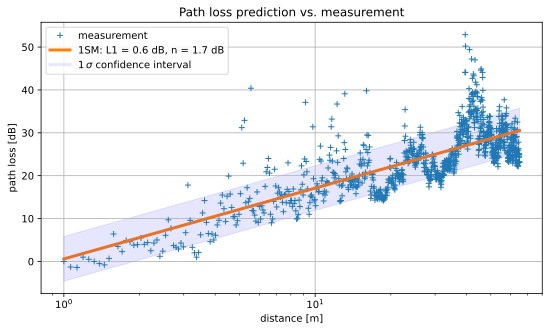

Empirical One Slope Model parameters:
L1 = 0.6 dB
n = 1.7
standard deviation = 5.2 dB
mean error = 3.9 dB


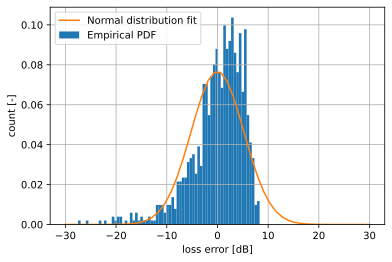

Shapiro-Wilk test p-value: 1.0


In [23]:
ret = one_slope('projekt2/data1/SBS-PRJ2data_A08.csv', 65, 1)
losses.append(ret[0])
err.append(ret[1])
stdev.append(ret[2])
d_axis.append(ret[3])

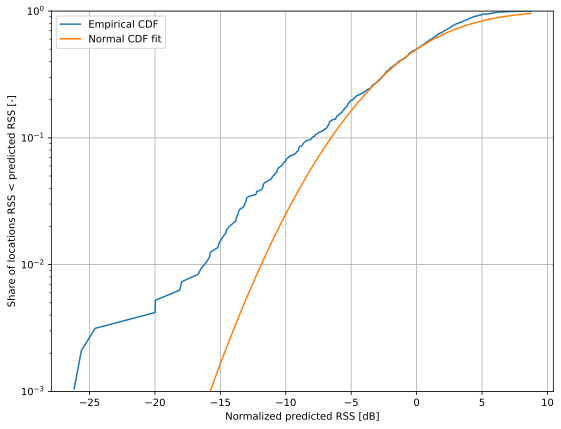

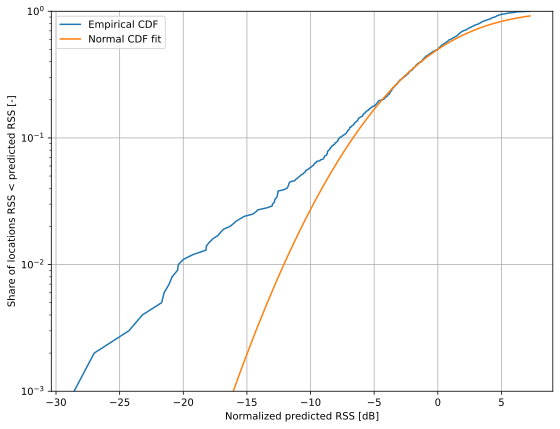

In [24]:
plot_ecdf(err[0], stdev[0])
plot_ecdf(err[1], stdev[1])

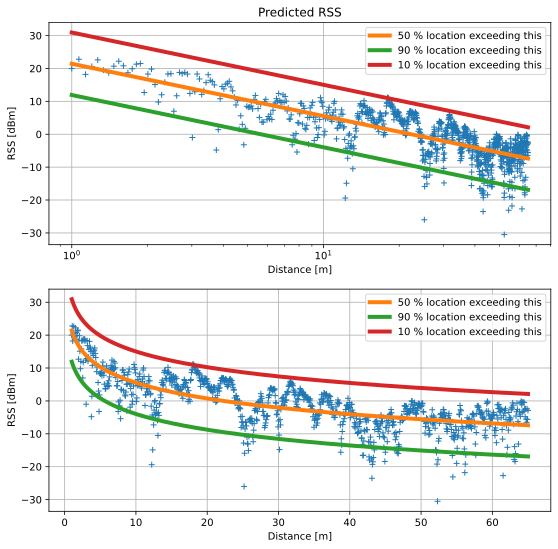

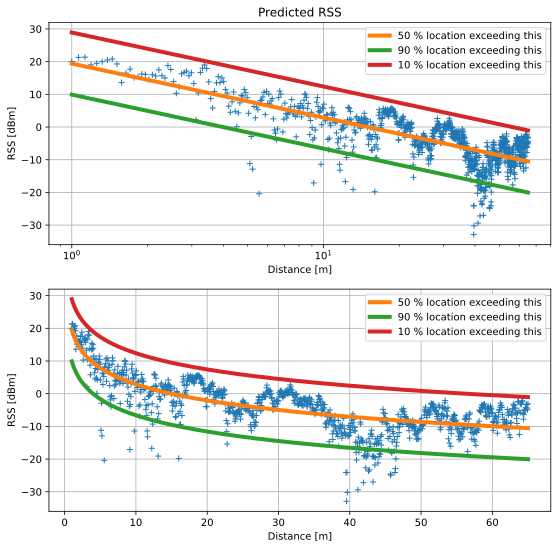

In [25]:
plot_deciles(losses[0], stdev[0], err[0], d_axis[0])
plot_deciles(losses[1], stdev[1], err[1], d_axis[1])

2177
2177
590
590
3973
3973


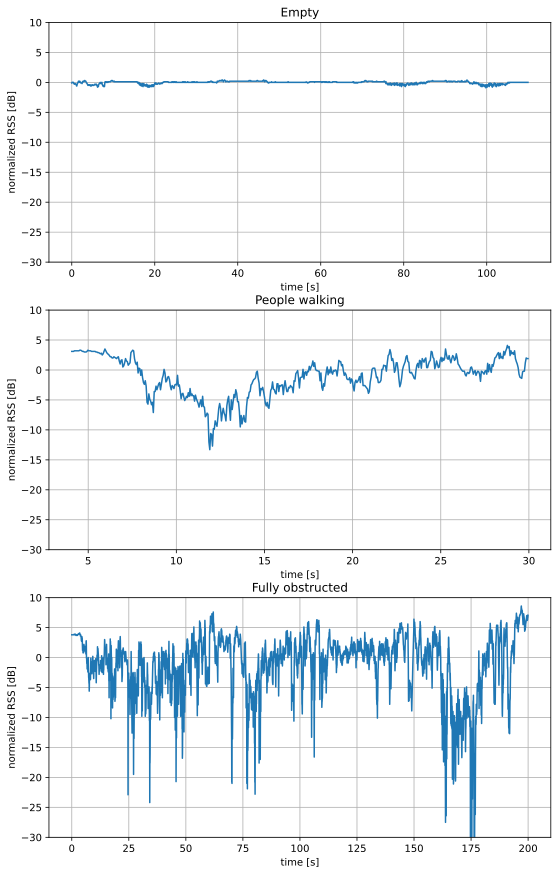

In [26]:
files_II = ['projekt2/data2\SBS-PRJ2data_R01.csv','projekt2/data2\SBS-PRJ2data_R02.csv', 'projekt2/data2\SBS-PRJ2data_R03.csv']
# data files representing measurements for fixed antennas
times_II = [110, 30, 200] # duration in seconds for each file
labels = ['Empty', 'People walking', 'Fully obstructed']
times_II_start = [0,80,0]
zero_median = stationary_data(files_II, times_II, times_II_start, labels)

Empty
median: 0.0 dB
min: -0.8999999999999915 dB
max: 0.4000000000000057 dB
50.0%: 	0.0 dB
20.0%: 	-0.19999999999998863 dB
10.0%: 	-0.3999999999999915 dB
5.0%: 	-0.5 dB
1.0%: 	-0.6999999999999886 dB
People walking
median: 0.0 dB
min: -12.900000000000006 dB
max: 4.5 dB
50.0%: 	-0.09999999999999432 dB
20.0%: 	-3.200000000000003 dB
10.0%: 	-5.099999999999994 dB
5.0%: 	-7.0 dB
1.0%: 	-10.200000000000003 dB
Fully obstructed
median: 0.0 dB
min: -35.2 dB
max: 8.599999999999994 dB
50.0%: 	-0.10000000000000853 dB
20.0%: 	-4.799999999999997 dB
10.0%: 	-8.100000000000009 dB
5.0%: 	-10.799999999999997 dB
1.0%: 	-19.10000000000001 dB


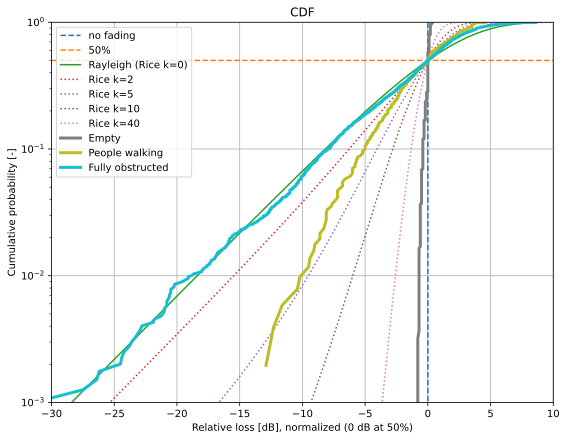

In [27]:
plt.figure(figsize=(9, 7))
plt.ylim(0.001,1)
plt.xlim(-30,10)
plt.title('CDF')
plt.xlabel('Relative loss [dB], normalized (0 dB at 50%)')
plt.ylabel('Cumulative probability [-]')
plt.plot([0,0],[0.0001,1], '--', label='no fading')
plt.plot([-30,10],[0.5,0.5], '--', label='50%')

# Rayleigh distribution normalized to median
x_lin = np.arange(np.power(10.0, -60/20), np.power(10.0, 10/20), 0.01)
x_log_rayleigh_norm = 20.0*np.log10(x_lin/sst.rayleigh.median())
y_rayleigh = sst.rayleigh.cdf(x_lin)
plt.semilogy(x_log_rayleigh_norm, y_rayleigh, label='Rayleigh (Rice k=0)')
# Rice distribution normalized to median
for k in [2,5,10,40]: # rice k-factor k=a**2/(2*sigma**2)
    a = 1 
    sigma = np.sqrt(a**2/(2*k))
    y_rice =  rice_cdf( x_lin, a, sigma )
    x_rice_norm = 20.0*np.log10(x_lin/rice_median(a, sigma))
    plt.semilogy(x_rice_norm, y_rice, ':', label='Rice k='+str(k))
    
# empirical CDF for measured data normalized to median
for i, rx in enumerate(zero_median):
    xcdf, ycdf = ecdf(rx, 50)
    plt.semilogy(xcdf, ycdf, label=labels[i], linewidth=3)
    print(labels[i]) 
    print("median: {} dB".format(np.median(xcdf)))
    print("min: {} dB".format(np.min(xcdf)))
    print("max: {} dB".format(np.max(xcdf)))
    for i in [0.5, 0.2, 0.1, 0.05, 0.01]:
        print("{}%: \t{} dB".format(i*100, xcdf[(abs(ycdf-i) <i/30).argmax()]   ))

plt.legend()
plt.grid()
plt.show()